In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

## PART 8. ANALYSIS ##

In [105]:
#1. Here we combine all the raw data and put it into a table
def make_pretty(styler): #this creates the style for the table
    styler.format_index(lambda v: v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

file_paths = ['MUO_data.txt', 'MUO_data_2.txt', 'MUO_data_3.txt', 'MUO_overnight.txt', 'MUO_overnight_10m.txt', 'MUO_overnight_2.txt', 'MUO_overnight_3.txt', 'MUO_overnight_4.txt',]

dataframes = []

for file in file_paths: #this code runs through each file and appends the contents into dataframes to be concatenated
    eachdata = pd.read_csv(file, skiprows=3, delimiter="\t")
    eachdata = data.iloc[:, :6]
    dataframes.append(eachdata)
data = pd.concat(dataframes, ignore_index=True)

data

,Ch0_time1 (s),Ch0_amp1 (V),Ch0_width1 (s),Ch0_time2 (s),Ch0_amp2 (V),Ch0_width2 (s)
0,0.000005,0.109923,6.329651e-08,0.000009,0.096631,6.549559e-08
1,0.000005,0.169607,5.830529e-08,0.000007,0.051945,6.276378e-08
2,0.000005,0.383609,7.240353e-08,0.000007,0.028155,5.974480e-08
3,0.000005,0.287399,5.969916e-08,0.000007,0.028805,5.637531e-08
4,0.000005,0.304023,6.672957e-08,0.000007,0.026121,5.219281e-08
...,...,...,...,...,...,...
16093627,0.000005,0.106630,6.066292e-08,0.000006,0.022363,5.689425e-08
16093628,0.000005,0.184583,6.698751e-08,0.000010,0.048071,5.719445e-08
16093629,0.000005,0.189321,7.325029e-08,0.000007,0.020624,5.552941e-08
16093630,0.000005,0.111476,6.619136e-08,0.000039,0.023609,5.446449e-08


Index(['Ch0_time1 (s)', 'Ch0_amp1 (V)', 'Ch0_width1 (s)', 'Ch0_time2 (s)',
       'Ch0_amp2 (V)', 'Ch0_width2 (s)'],
      dtype='object')


Text(0.5, 1.0, 'Heights of Pulse 1 and Pulse 2')

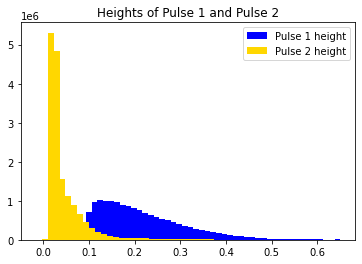

In [106]:
#2. Here we examine the distribution of pulse heights and pulse widths
data.columns
print(data.columns)

#heightdiff = combined_data['Ch0_amp2 (V)'] - combined_data['Ch0_amp1 (V)']
p1height = data['Ch0_amp1 (V)']
plt.hist(p1height, bins=50, label = 'Pulse 1 height', color = 'blue')
p2height = data['Ch0_amp2 (V)']
plt.hist(p2height, bins=50, label = 'Pulse 2 height', color = 'gold')
plt.legend()
plt.title('Heights of Pulse 1 and Pulse 2')

Text(0.5, 1.0, 'Widths of Pulse 1 and Pulse 2')

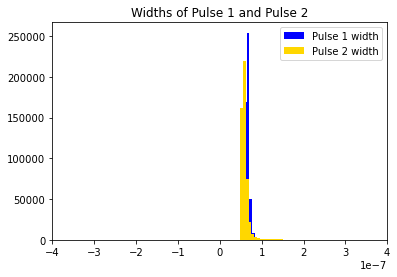

In [103]:
#widthdiff = combined_data['Ch0_width2 (s)'] - combined_data['Ch0_width1 (s)']
p1width = data['Ch0_width1 (s)']
plt.hist(p1width, bins=100, label = 'Pulse 1 width', color = 'blue')
p2width = data['Ch0_width2 (s)']
plt.hist(p2width, bins=100, label = 'Pulse 2 width', color = 'gold')
plt.xlim(-0.0000004, 0.0000004)
plt.legend()
plt.title('Widths of Pulse 1 and Pulse 2')

So we can see that...

Text(0.5, 1.0, 'Uncut Time Difference between Pulses 1 and 2')

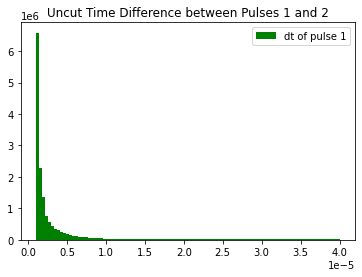

In [141]:
#Before applying cuts, we can first see what 
dt = data['Ch0_time2 (s)'] - data['Ch0_time1 (s)']
plt.hist(dt, bins=100, label = 'dt of pulse 1', color = 'green')
plt.legend()
#plt.xlim(0.0000053, 0.0000056)
plt.title('Uncut Time Difference between Pulses 1 and 2')

In [155]:
#
thresh_height = data['Ch0_amp1 (V)'].quantile(0.5)
fil_height = data[data['Ch0_amp1 (V)']>0.5]
#print(len(data['Ch0_amp1 (V)']))
print(len(fil_height))

#I think the section below take the time cut of the heights that matter and filter out the time data based on that but idk. My brain is deadge
time_diff = fil_height["Ch0_time2 (s)"] - fil_height["Ch0_time1 (s)"]
threshold2 = time_diff.quantile(1 - 0.2)
df_filtered = fil_height[time_diff > threshold2]
print(len(df_filtered))

#plt.hist(fil_dt1, bins=100, label = 'dt of pulse 1', color = 'green')
#plt.yscale("log")
#plt.xscale("log")

197312
39424
